INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy5rw0ab7/0ft_62na.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy5rw0ab7/a7a8xpt_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54561', 'data', 'file=/tmp/tmpy5rw0ab7/0ft_62na.json', 'init=/tmp/tmpy5rw0ab7/a7a8xpt_.json', 'output', 'file=/tmp/tmpy5rw0ab7/prophet_modelcoftasph/prophet_model-20250404084919.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:49:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:49:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


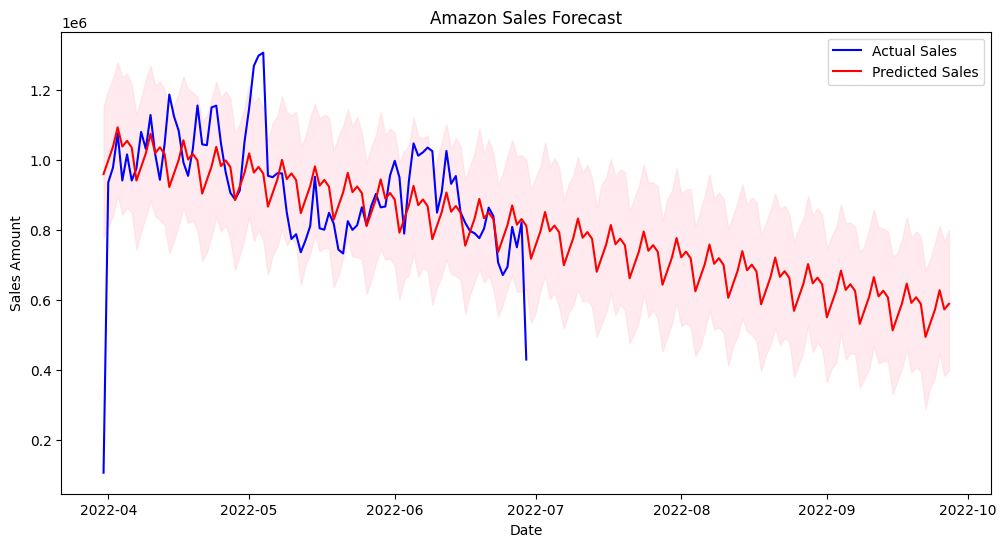

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

df = pd.read_csv("amazon_mod.csv", parse_dates=["Order_Date"])

sales_data = df.groupby("Order_Date")["Sale_Amount"].sum().reset_index()

sales_data = sales_data.rename(columns={"Order_Date": "ds", "Sale_Amount": "y"})

model = Prophet()
model.fit(sales_data)

future_dates = model.make_future_dataframe(periods=90)

forecast = model.predict(future_dates)

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data, x="ds", y="y", label="Actual Sales", color="blue")
sns.lineplot(data=forecast, x="ds", y="yhat", label="Predicted Sales", color="red")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color="pink", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.title("Amazon Sales Forecast")
plt.legend()
plt.show()


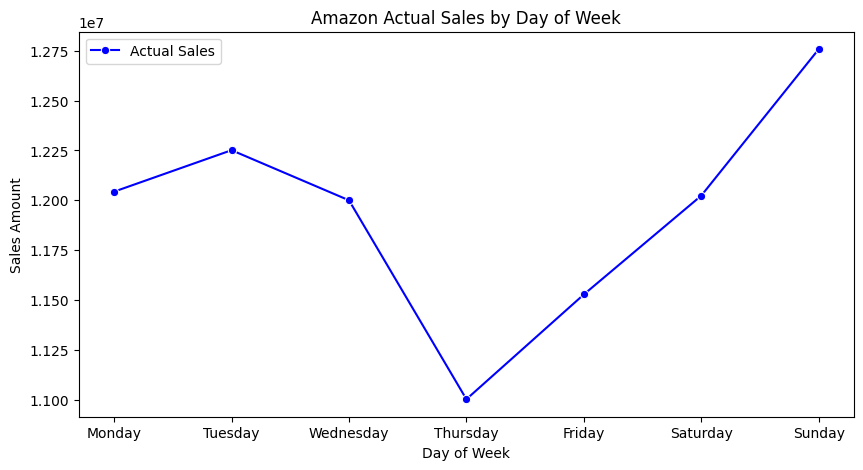

In [8]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Day_of_Week"] = df["Order_Date"].dt.day_name()

df_weekly = df.groupby("Day_of_Week")["Sale_Amount"].sum().reset_index()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_weekly["Day_of_Week"] = pd.Categorical(df_weekly["Day_of_Week"], categories=days_order, ordered=True)
df_weekly = df_weekly.sort_values("Day_of_Week")

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_weekly["Day_of_Week"], y=df_weekly["Sale_Amount"], marker="o", color="blue", label="Actual Sales")

plt.xlabel("Day of Week")
plt.ylabel("Sales Amount")
plt.title("Amazon Actual Sales by Day of Week")
plt.legend()
plt.show()


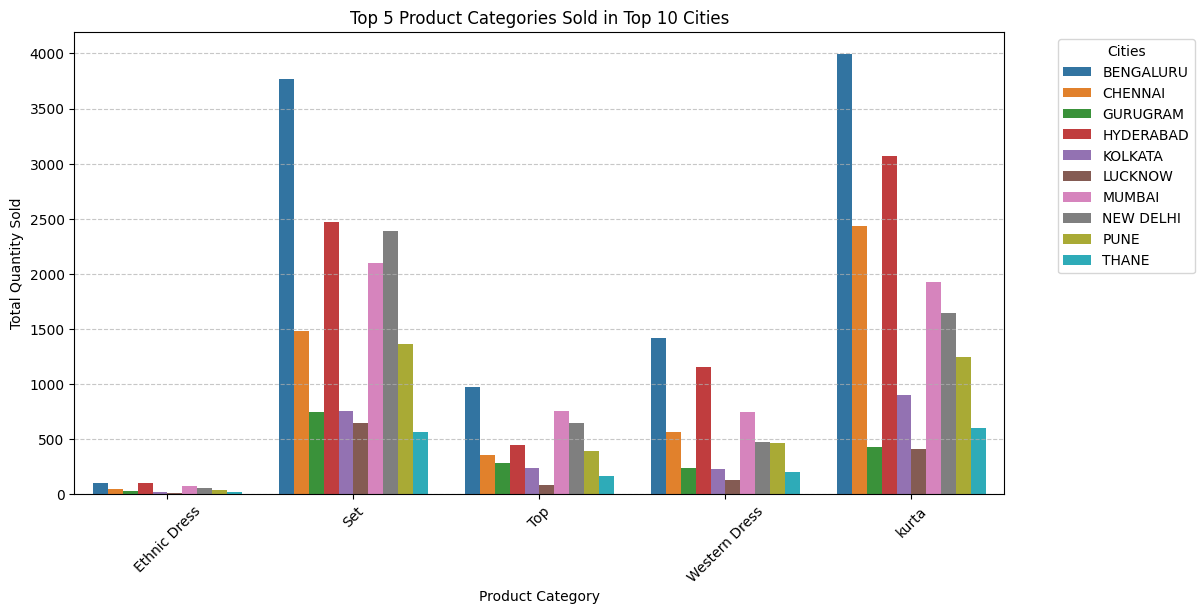

In [11]:
city_category_sales = df.groupby(["Shipping_City", "Product_Category"])["Quantity"].sum().reset_index()

top_cities = city_category_sales.groupby("Shipping_City")["Quantity"].sum().nlargest(10).index
filtered_data = city_category_sales[city_category_sales["Shipping_City"].isin(top_cities)]

top_categories = filtered_data.groupby("Product_Category")["Quantity"].sum().nlargest(5).index
filtered_data = filtered_data[filtered_data["Product_Category"].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x="Product_Category", y="Quantity", hue="Shipping_City", dodge=True)

plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.title("Top 5 Product Categories Sold in Top 10 Cities")
plt.xticks(rotation=45)
plt.legend(title="Cities", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<ipython-input-13-8f55beef77f4>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_category_per_city = filtered_data.groupby("Shipping_City").apply(


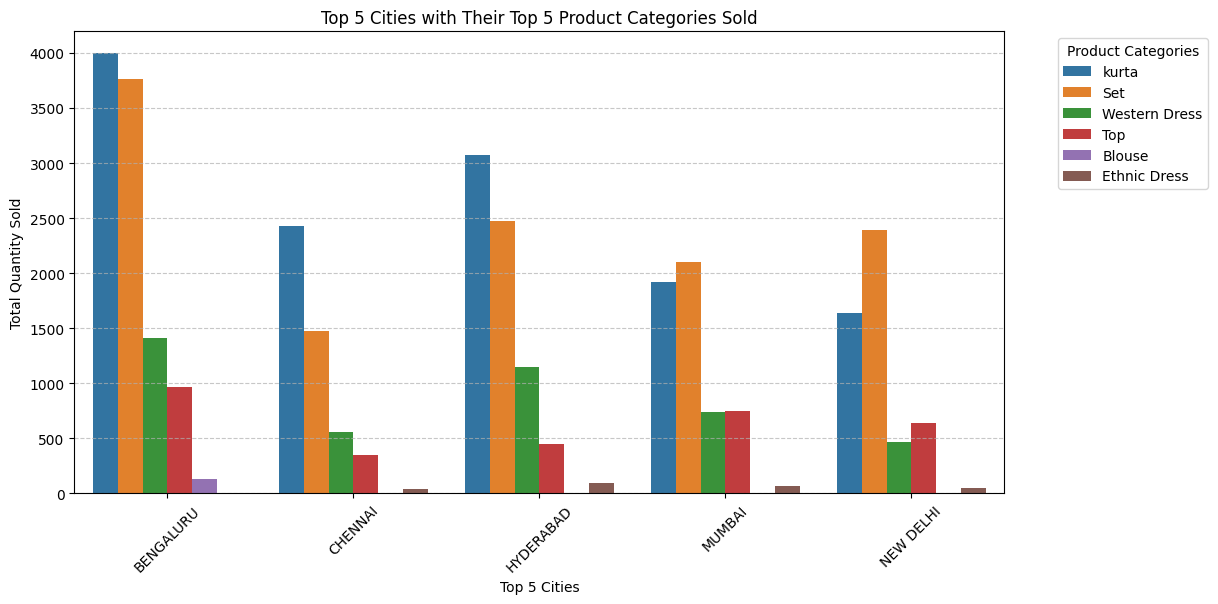

In [13]:
city_category_sales = df.groupby(["Shipping_City", "Product_Category"])["Quantity"].sum().reset_index()

top_cities = city_category_sales.groupby("Shipping_City")["Quantity"].sum().nlargest(5).index
filtered_data = city_category_sales[city_category_sales["Shipping_City"].isin(top_cities)]

top_category_per_city = filtered_data.groupby("Shipping_City").apply(
    lambda x: x.nlargest(5, "Quantity")
).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_category_per_city, x="Shipping_City", y="Quantity", hue="Product_Category", dodge=True)

plt.xlabel("Top 5 Cities")
plt.ylabel("Total Quantity Sold")
plt.title("Top 5 Cities with Their Top 5 Product Categories Sold")
plt.xticks(rotation=45)
plt.legend(title="Product Categories", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()